In [3]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
df = pd.read_csv('T_H_RESULT_T20.csv', usecols=['W_DEPARTURE','H_DEPARTURE','H_ARRIVAL','precipitation','DELAY_DEPARTURE','DELAY_ARRIVAL'])
# 正しく読み込まれたことを確認

df.head()

,W_DEPARTURE,H_DEPARTURE,H_ARRIVAL,precipitation,DELAY_DEPARTURE,DELAY_ARRIVAL
0,1,8,10,0,0,0
1,1,13,15,0,0,-21
2,1,17,18,0,0,-23
3,1,19,20,0,0,-19
4,2,8,10,0,0,-2


In [25]:
df_target = df['DELAY_ARRIVAL']
df_target.head()

0     0
1   -21
2   -23
3   -19
4    -2
Name: DELAY_ARRIVAL, dtype: int64

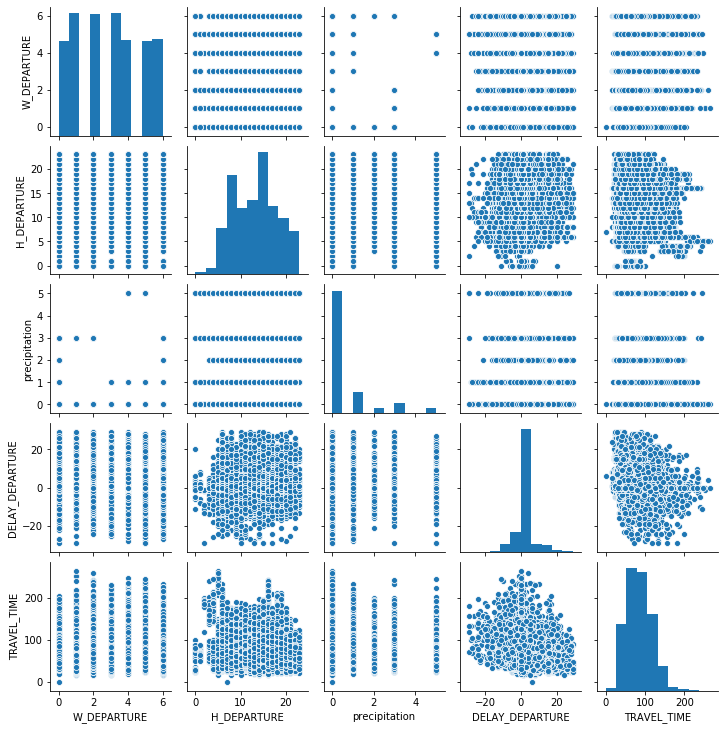

In [6]:
# 散布図行列を出力（時間がかかります）
import seaborn as sns
sns.pairplot(df, height=2.0)
plt.show()

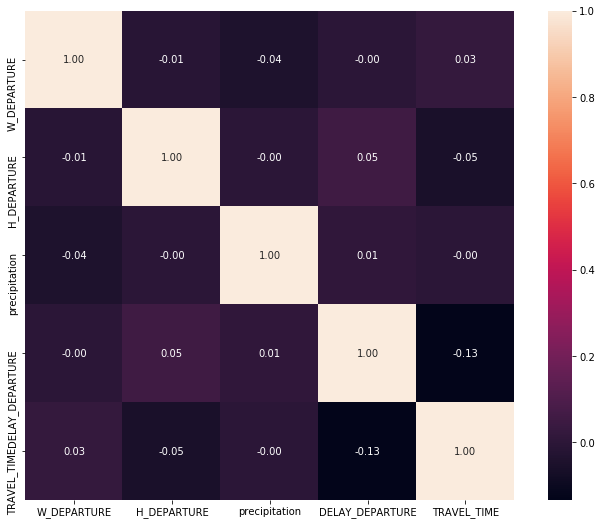

In [7]:
# ヒートマップの表示
plt.figure(figsize=(12, 9))
# annot：数値を表示するか
# square：正方形で表示するか
# fmt：表示する数値の型（.2f→float型で小数点以下２桁表示）
sns.heatmap(df.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [8]:
X = df.loc[:, ['W_DEPARTURE', 'H_DEPARTURE','H_ARRIVAL']].values
y = df.loc[:, ['DELAY_ARRIVAL']].values

# ホールド・アウト法によるデータの分割（今回はtestを２割とする）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# 分割されたデータの個数を確認
# print(X.shape)
# print(y.shape)
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

/Users/xiafei/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


KeyError: "None of [Index(['DELAY_ARRIVAL'], dtype='object')] are in the [columns]"

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
# 決定係数：データのモデルへの当てはまりの良さ
print('train: %.3f' % lr.score(X_train, y_train))
print('test : %.3f' % lr.score(X_test, y_test))

In [9]:
df = pd.read_csv('T_H_RESULT_T20.csv', usecols=['W_DEPARTURE','H_DEPARTURE','H_ARRIVAL','precipitation','DELAY_DEPARTURE','DELAY_ARRIVAL'])

#星期离散化
weeks = pd.get_dummies(df['W_DEPARTURE'])
weeks = weeks.add_prefix("{}_".format('DAY_WEEK'))
# data_learn.drop('animal',axis=1,inplace=True)
df = df.join(weeks)

times = pd.get_dummies(df['H_DEPARTURE'])
times = times.add_prefix("{}_".format('TIME_DAY'))
df = df.join(times)

df.head()

,W_DEPARTURE,H_DEPARTURE,H_ARRIVAL,precipitation,DELAY_DEPARTURE,DELAY_ARRIVAL,DAY_WEEK_0,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,TIME_DAY_8,TIME_DAY_13,TIME_DAY_17,TIME_DAY_19
0,1,8,10,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,1,13,15,0,0,-21,0,1,0,0,0,0,0,0,1,0,0
2,1,17,18,0,0,-23,0,1,0,0,0,0,0,0,0,1,0
3,1,19,20,0,0,-19,0,1,0,0,0,0,0,0,0,0,1
4,2,8,10,0,0,-2,0,0,1,0,0,0,0,1,0,0,0


In [10]:
df.drop('W_DEPARTURE',axis=1,inplace=True)
df.drop('H_DEPARTURE',axis=1,inplace=True)
df.drop('H_ARRIVAL',axis=1,inplace=True)
df.drop('DELAY_ARRIVAL',axis=1,inplace=True)

df.head()

,precipitation,DELAY_DEPARTURE,DAY_WEEK_0,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,TIME_DAY_8,TIME_DAY_13,TIME_DAY_17,TIME_DAY_19
0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,1,0,0,0


In [11]:
X = df.values
y = df_target.values
# ホールド・アウト法によるデータの分割（今回はtestを２割とする）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)
# 決定係数：データのモデルへの当てはまりの良さ
print('train: %.3f' % lr.score(X_train, y_train))
print('test : %.3f' % lr.score(X_test, y_test))

NameError: name 'df_target' is not defined

In [19]:
df = pd.read_csv('T_H_RESULT_ALL.csv', usecols=['SZ_DIANAME','W_DEPARTURE','H_DEPARTURE','precipitation','DELAY_DEPARTURE','TRAVEL_TIME'])

df_F1 = df.loc[df['SZ_DIANAME'] == 'T20']
df_F1_target = df_F1['TRAVEL_TIME']
# 正しく読み込まれたことを確認
df_F1.head()


,SZ_DIANAME,W_DEPARTURE,H_DEPARTURE,precipitation,DELAY_DEPARTURE,TRAVEL_TIME
179,T20,1,8,0,0,120
432,T20,1,13,0,0,109
675,T20,1,17,0,0,47
769,T20,1,19,0,0,61
1095,T20,2,8,0,0,118


In [20]:
df_F1.corr()

,W_DEPARTURE,H_DEPARTURE,precipitation,DELAY_DEPARTURE,TRAVEL_TIME
W_DEPARTURE,1.000000,-0.034666,-0.083516,0.097244,0.100672
H_DEPARTURE,-0.034666,1.000000,0.108832,0.191248,-0.854282
precipitation,-0.083516,0.108832,1.000000,-0.096074,-0.081764
DELAY_DEPARTURE,0.097244,0.191248,-0.096074,1.000000,-0.339423
TRAVEL_TIME,0.100672,-0.854282,-0.081764,-0.339423,1.000000


In [25]:
df_F1.corr()['TRAVEL_TIME']['H_DEPARTURE']

-0.854282414433365

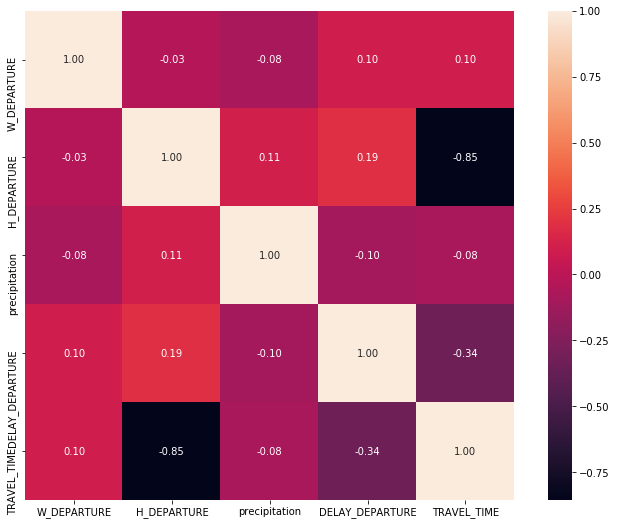

In [13]:
# ヒートマップの表示
plt.figure(figsize=(12, 9))
# annot：数値を表示するか
# square：正方形で表示するか
# fmt：表示する数値の型（.2f→float型で小数点以下２桁表示）
sns.heatmap(df_F1.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [14]:
#星期离散化
weeks = pd.get_dummies(df_F1['W_DEPARTURE'])
weeks = weeks.add_prefix("{}_".format('DAY_WEEK'))
# data_learn.drop('animal',axis=1,inplace=True)
df_F1 = df_F1.join(weeks)

times = pd.get_dummies(df_F1['H_DEPARTURE'])
times = times.add_prefix("{}_".format('TIME_DAY'))
df_F1 = df_F1.join(times)

df_F1.head()

,SZ_DIANAME,W_DEPARTURE,H_DEPARTURE,precipitation,DELAY_DEPARTURE,TRAVEL_TIME,DAY_WEEK_0,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,TIME_DAY_8,TIME_DAY_13,TIME_DAY_17,TIME_DAY_19
179,T20,1,8,0,0,120,0,1,0,0,0,0,0,1,0,0,0
432,T20,1,13,0,0,109,0,1,0,0,0,0,0,0,1,0,0
675,T20,1,17,0,0,47,0,1,0,0,0,0,0,0,0,1,0
769,T20,1,19,0,0,61,0,1,0,0,0,0,0,0,0,0,1
1095,T20,2,8,0,0,118,0,0,1,0,0,0,0,1,0,0,0


In [15]:
df_F1.drop('SZ_DIANAME',axis=1,inplace=True)
df_F1.drop('W_DEPARTURE',axis=1,inplace=True)
df_F1.drop('H_DEPARTURE',axis=1,inplace=True)
# df_F1.drop('H_ARRIVAL',axis=1,inplace=True)
df_F1.drop('TRAVEL_TIME',axis=1,inplace=True)

df_F1.head()

,precipitation,DELAY_DEPARTURE,DAY_WEEK_0,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,TIME_DAY_8,TIME_DAY_13,TIME_DAY_17,TIME_DAY_19
179,0,0,0,1,0,0,0,0,0,1,0,0,0
432,0,0,0,1,0,0,0,0,0,0,1,0,0
675,0,0,0,1,0,0,0,0,0,0,0,1,0
769,0,0,0,1,0,0,0,0,0,0,0,0,1
1095,0,0,0,0,1,0,0,0,0,1,0,0,0


In [16]:
X = df_F1.values
y = df_F1_target.values
# ホールド・アウト法によるデータの分割（今回はtestを２割とする）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)
# 決定係数：データのモデルへの当てはまりの良さ
print('train: %.3f' % lr.score(X_train, y_train))
print('test : %.3f' % lr.score(X_test, y_test))

NameError: name 'train_test_split' is not defined

In [17]:
print(df_F1.corr())

                 precipitation  DELAY_DEPARTURE  DAY_WEEK_0  DAY_WEEK_1  \
precipitation     1.000000e+00        -0.096074    0.329513   -0.224733   
DELAY_DEPARTURE  -9.607374e-02         1.000000   -0.062829   -0.230775   
DAY_WEEK_0        3.295128e-01        -0.062829    1.000000   -0.176819   
DAY_WEEK_1       -2.247333e-01        -0.230775   -0.176819    1.000000   
DAY_WEEK_2        8.550951e-17         0.026521   -0.234577   -0.201008   
DAY_WEEK_3       -2.247333e-01         0.246252   -0.176819   -0.151515   
DAY_WEEK_4       -1.348400e-01         0.161302   -0.176819   -0.151515   
DAY_WEEK_5        4.115688e-01        -0.213280   -0.144686   -0.123980   
DAY_WEEK_6       -1.348400e-01         0.043679   -0.176819   -0.151515   
TIME_DAY_8       -1.157539e-01        -0.144375   -0.071058    0.082501   
TIME_DAY_13       3.038349e-02        -0.048963    0.007723   -0.022123   
TIME_DAY_17       4.093567e-02         0.022956    0.060523   -0.044947   
TIME_DAY_19       5.46902